<a href="https://colab.research.google.com/github/siddhi5386/facial-landmarks/blob/master/facial_landmarks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import imutils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def rect_to_bb(rect):
	# take a bounding predicted by dlib and convert it
	# to the format (x, y, w, h) as we would normally do
	# with OpenCV
	x = rect.left()
	y = rect.top()
	w = rect.right() - x
	h = rect.bottom() - y
	# return a tuple of (x, y, w, h)
	return (x, y, w, h)

In [ ]:
def shape_to_np(shape, dtype="int"):
	# initialize the list of (x, y)-coordinates
	coords = np.zeros((68, 2), dtype=dtype)
	# loop over the 68 facial landmarks and convert them
	# to a 2-tuple of (x, y)-coordinates
	for i in range(0, 68):
		coords[i] = (shape.part(i).x, shape.part(i).y)
	# return the list of (x, y)-coordinates
	return coords

In [ ]:
# import the necessary packages

import numpy as np
import argparse
import imutils
import dlib
import cv2

In [ ]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/My Drive/deep learning/shape_predictor_68_face_landmarks.dat")

In [ ]:
import imutils

image = cv2.imread("/content/drive/My Drive/deep learning/siddhi photo.jpg")
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# detect faces in the grayscale image
rects = detector(gray, 1)

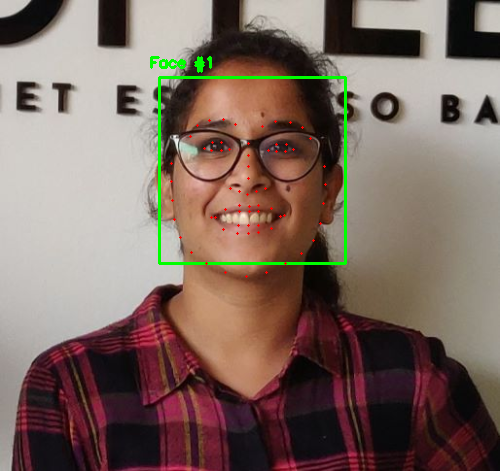

-1

In [ ]:
from google.colab.patches import cv2_imshow

# loop over the face detections
for (i, rect) in enumerate(rects):
	# determine the facial landmarks for the face region, then convert the facial landmark (x, y)-coordinates to a NumPy array

	shape = predictor(gray, rect)
	shape = shape_to_np(shape)
 
	# convert dlib's rectangle to a OpenCV-style bounding box [i.e., (x, y, w, h)], then draw the face bounding box
	(x, y, w, h) = rect_to_bb(rect)
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
 
	# show the face number
	cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
	# loop over the (x, y)-coordinates for the facial landmarks and draw them on the image

	for (x, y) in shape:
		cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
# show the output image with the face detections + facial landmarks
cv2_imshow(image)
cv2.waitKey(0)

In [ ]:
# seeing individual landmarks separtely!!!!

In [ ]:
# define a dictionary that maps the indexes of the facial landmarks to specific face regions

import collections

FACIAL_LANDMARKS_IDXS = collections.OrderedDict([
	("mouth", (48, 68)),
	("right_eyebrow", (17, 22)),
	("left_eyebrow", (22, 27)),
	("right_eye", (36, 42)),
	("left_eye", (42, 48)),
	("nose", (27, 35)),
	("jaw", (0, 17))
])

In [ ]:
def visualize_facial_landmarks(image, shape, colors=None, alpha=0.75):
	# create two copies of the input image -- one for the overlay and one for the final output image
	overlay = image.copy()
	output = image.copy()
	# if the colors list is None, initialize it with a unique color for each facial landmark region

	if colors is None:
		colors = [(19, 199, 109), (79, 76, 240), (230, 159, 23),
			(168, 100, 168), (158, 163, 32),
			(163, 38, 32), (180, 42, 220)]

# loop over the facial landmark regions individually
	for (i, name) in enumerate(FACIAL_LANDMARKS_IDXS.keys()):
		# grab the (x, y)-coordinates associated with the face landmark
		(j, k) = FACIAL_LANDMARKS_IDXS[name]
		pts = shape[j:k]

		# check if are supposed to draw the jawline
		if name == "jaw":
			# since the jawline is a non-enclosed facial region, just draw lines between the (x, y)-coordinates

			for l in range(1, len(pts)):
				ptA = tuple(pts[l - 1])
				ptB = tuple(pts[l])
				cv2.line(overlay, ptA, ptB, colors[i], 2)
		# otherwise, compute the convex hull of the facial landmark coordinates points and display it

		else:
			hull = cv2.convexHull(pts)
			cv2.drawContours(overlay, [hull], -1, colors[i], -1)
   
	# apply the transparent overlay
	cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)
	# return the output image
	return output

In [ ]:
# import the necessary packages
import numpy as np
import argparse
import imutils
import dlib
import cv2

# initialize dlib's face detector (HOG-based) and then create the facial landmark predictor

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/My Drive/deep learning/shape_predictor_68_face_landmarks.dat")

# load the input image, resize it, and convert it to grayscale
image = cv2.imread("/content/drive/My Drive/deep learning/siddhi photo.jpg")
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect faces in the grayscale image
rects = detector(gray, 1)

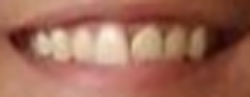

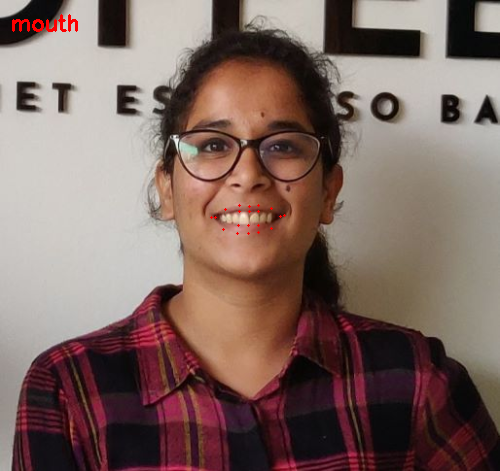

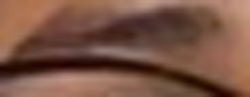

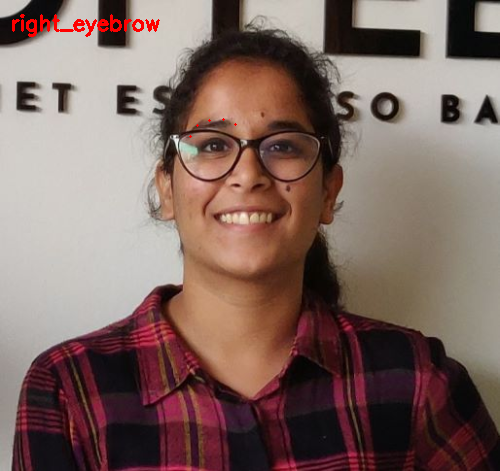

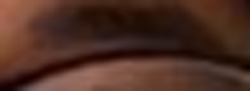

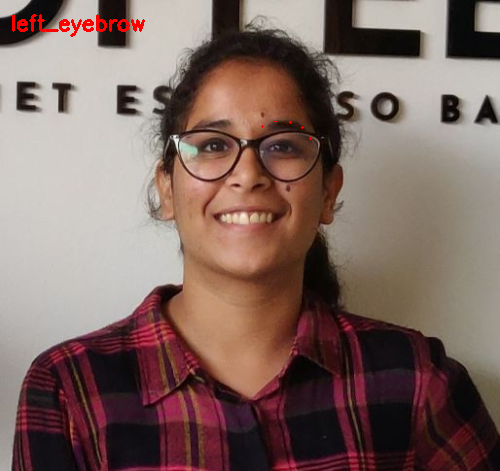

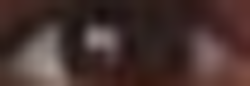

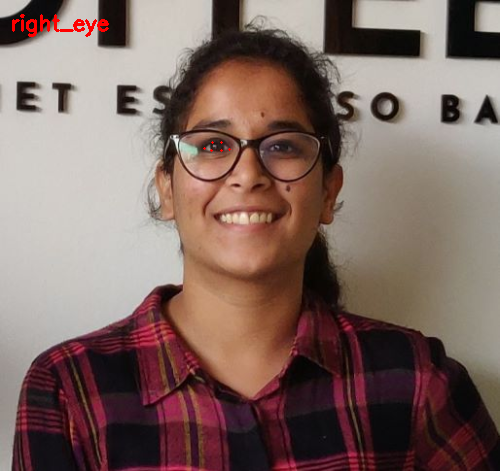

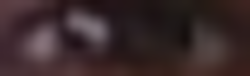

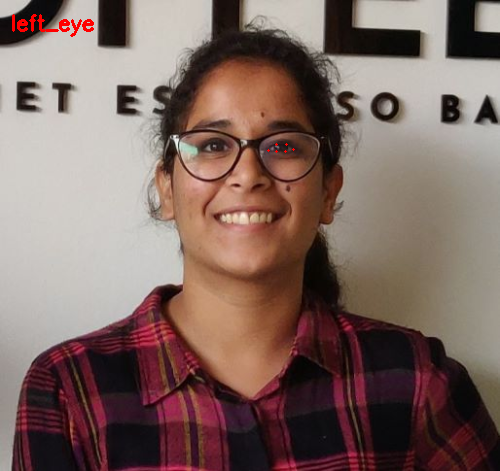

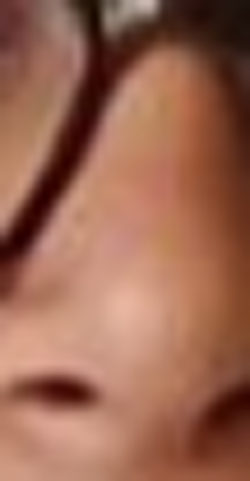

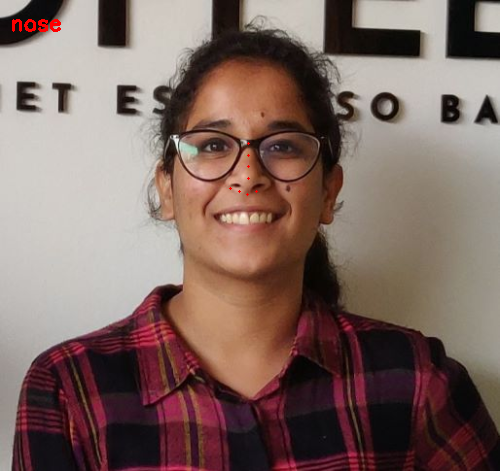

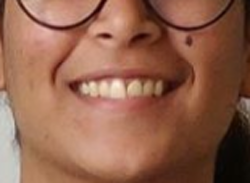

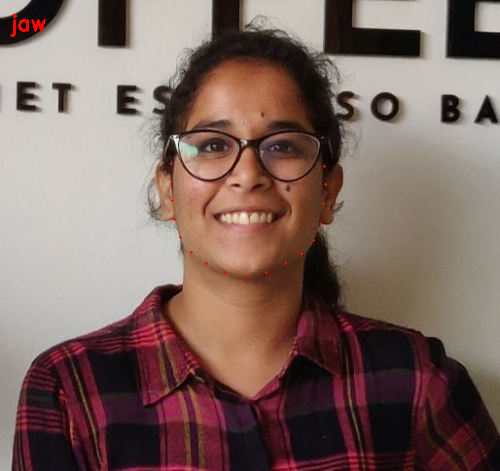

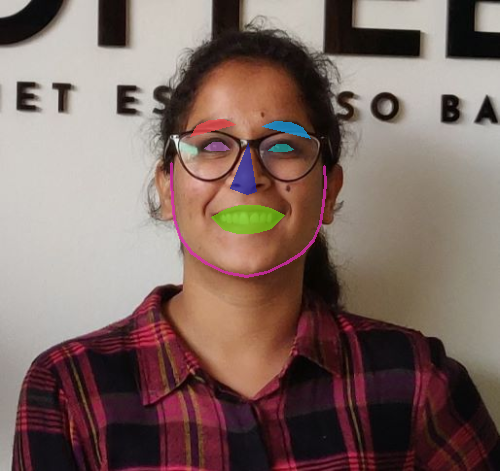

In [ ]:
# loop over the face detections
for (i, rect) in enumerate(rects):
	# determine the facial landmarks for the face region, then convert the landmark (x, y)-coordinates to a NumPy array

	shape = predictor(gray, rect)
	shape = shape_to_np(shape)
	# loop over the face parts individually
	for (name, (i, j)) in FACIAL_LANDMARKS_IDXS.items():
   
		# clone the original image so we can draw on it, then display the name of the face part on the image
		clone = image.copy()
		cv2.putText(clone, name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,0.7, (0, 0, 255), 2)
  
		# loop over the subset of facial landmarks, drawing the specific face part
		for (x, y) in shape[i:j]:
			cv2.circle(clone, (x, y), 1, (0, 0, 255), -1)
   
		# extract the ROI of the face region as a separate image
		(x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]]))
		roi = image[y:y + h, x:x + w]
		roi = imutils.resize(roi, width=250, inter=cv2.INTER_CUBIC)
		# show the particular face part
		cv2_imshow( roi)
		cv2_imshow( clone)
		cv2.waitKey(0)
	# visualize all facial landmarks with a transparent overlay
	output = visualize_facial_landmarks(image, shape)
	cv2_imshow( output)
	cv2.waitKey(0)